In [1]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
train_data.shape,'-', len(train_data[0])

((60000, 28, 28), '-', 28)

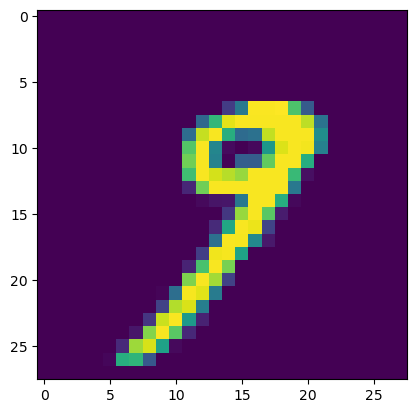

In [4]:
plt.imshow(train_data[33])

In [5]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train_data.shape, test_data.shape
x_train = train_data.reshape((60000, 28*28))
x_train = np.float32(x_train)/255

x_test = test_data.reshape((10000, 28*28))
x_test = np.float32(x_test)/255

train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32))

In [10]:
train_labels[0]

5

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2550 - accuracy: 0.9272
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1040 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0686 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0493 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0372 - accuracy: 0.9887


In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9805


[0.06683320552110672, 0.9804999828338623]

313/313 [==============================] - 1s 3ms/step
pred_img 6


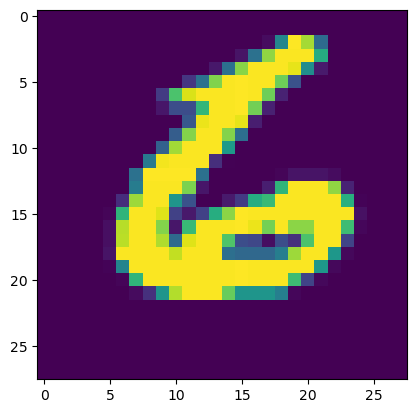

In [57]:
# Prediccion
num = 9999
img = x_test[num].reshape(28, 28)
plt.imshow(img)

predict = model.predict(x_test)
# predict[4]
pred_img = np.argmax(predict[num])
print("pred_img", pred_img)
